In [2]:
import pandas as pd
from tabulate import tabulate

In [ ]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials

scope = ['https://spreadsheets.google.com/feeds']
credentials = ServiceAccountCredentials.from_json_keyfile_name('./<YOUR CREDENTIALS FILENAME>.json', scope)
gc = gspread.authorize(credentials)

In [3]:
DATA_PATH = "adam_wingate_feb15/adam1.csv"
df = pd.read_csv(DATA_PATH)

# Frequency as a function of time ($\frac{cycles}{minute}$)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

,distance,split-time
0,15,6.46
1,25,11.96
2,35,17.60
3,50,26.90
4,65,34.50
5,75,40.50


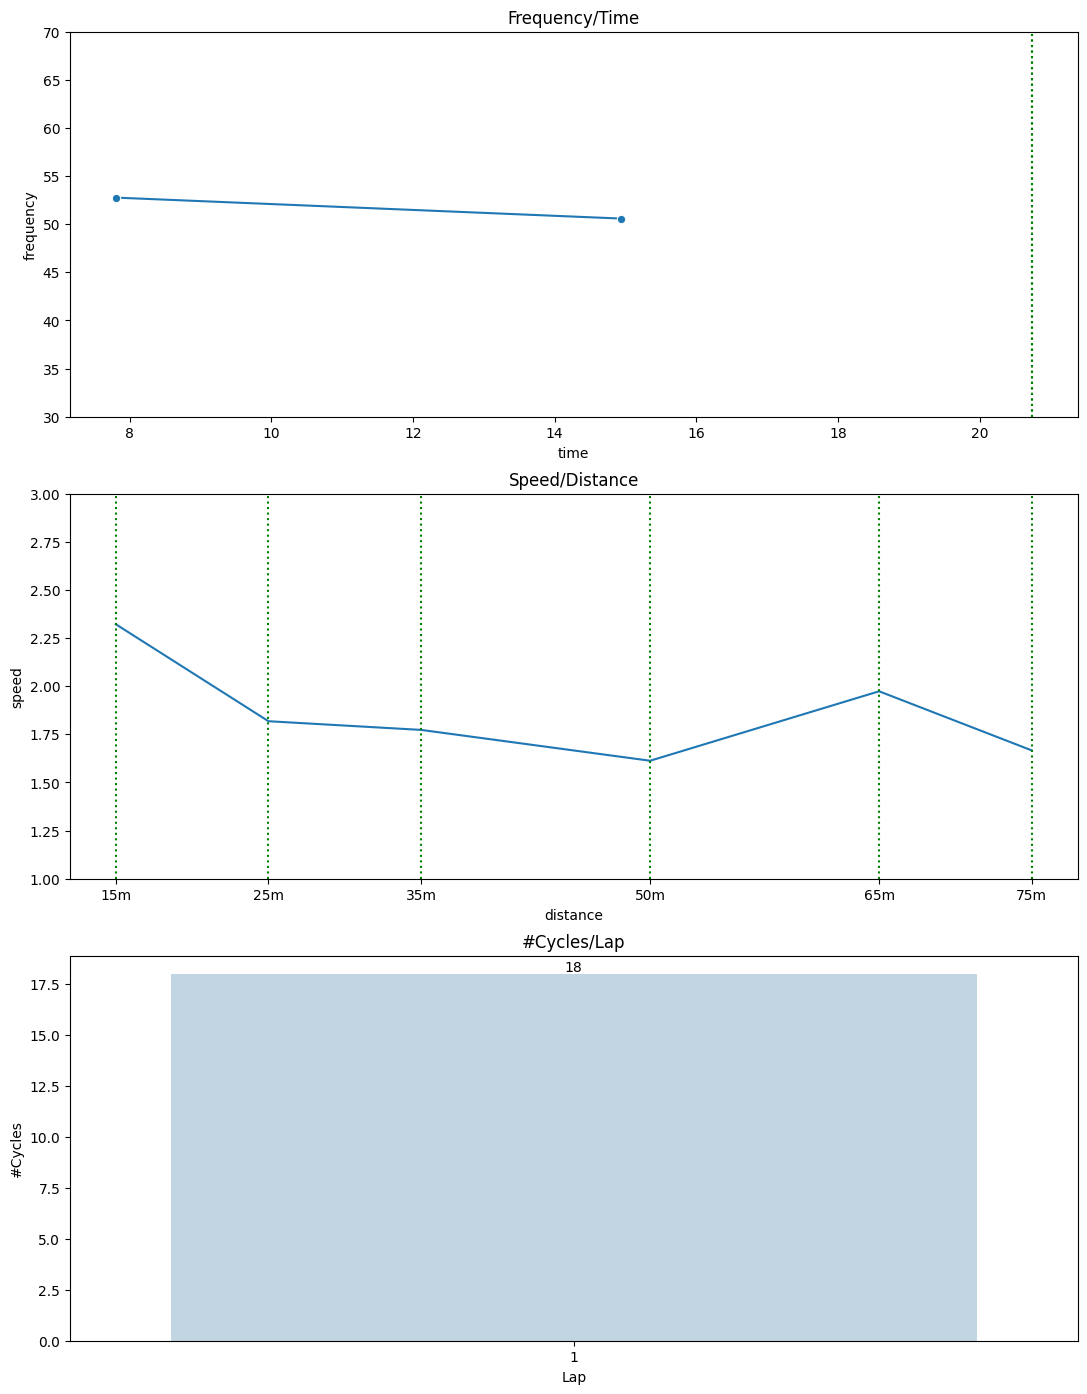

In [5]:
import os, sys
sys.path.insert(0, os.path.abspath('..'))
from utils import race_report as RR
from utils import plotting

# 25 for SCM, 50 for LCM.
LAP_LEN = 25

fig, ax = plt.subplots(nrows=3, figsize=(13, 17))

# Distance ticks/labels
lap_indices = RR.get_bo_indices(df)
distances = [RR.format_distance((i + 1)*LAP_LEN) for i in range(len(lap_indices[1:]))]

# Frequency Dataframe.
df_frequency = df[[RR.COL_MES, RR.COL_TIME]][df[RR.COL_MES] == RR.VAL_CYCLE]
df_frequency.loc[:, RR.COL_Y] = (60 / df[RR.COL_TIME]).rolling(window=4, step=4).mean()


# Speed Dataframe.
df_speed = RR.calc_speed(df, lap_indices[1:])

# Splits.
display(df_speed[["distance", "split-time"]].round(decimals=2).astype({"distance": int}))

# DPS.
(stats, df_frequency) = RR.calc_frequency(df_frequency)
# display(df_frequency.drop(["interval-time", RR.COL_X, RR.COL_MES], axis=1))
table = tabulate(pd.DataFrame({"std": [stats.std], "mean": [stats.mean]})
                 , tablefmt='text'
                 ,headers=["std", "mean"])
# Plotting.

#
# Distances
#
plotting.plot_frequency(df_frequency, bo_indices=lap_indices, ax=ax[0])

#
# Speed
#
plotting.plot_speed(df_speed, ax=ax[1])

#
# DPS
#
plotting.plot_dps(df, ax=ax[2])
plt.show()